TF version = 2.10.0
simulating training, valid and test sets
done
initializing neural appropximator
done

size 100
Neural network initialized with the following settings:
Neurons per layer: 20
Amount of hidden layers: 2
Activations functions: <function tanh at 0x00000227E155ECA0>
Training will be done with the following settings:

min_batch_size: 50
batches per epoch: 10
Hence, used batch_size will be: 50
epochs: 100
learning_rate_schedule: [(0.0, 0.01), (0.2, 0.001), (0.4, 0.0001), (0.6, 1e-05), (0.8, 1e-06)]

 Train started:
RMSE on training data after 10 epochs is 0.10265636861480903. RMSE on test data: 0.10292747957757589
RMSE on training data after 20 epochs is 0.06442756227471794. RMSE on test data: 0.06454588607474435
RMSE on training data after 30 epochs is 0.056267220749006475. RMSE on test data: 0.05646131791752729
RMSE on training data after 40 epochs is 0.055067010988673816. RMSE on test data: 0.05527395783344285
RMSE on training data after 50 epochs is 0.054797717787857476

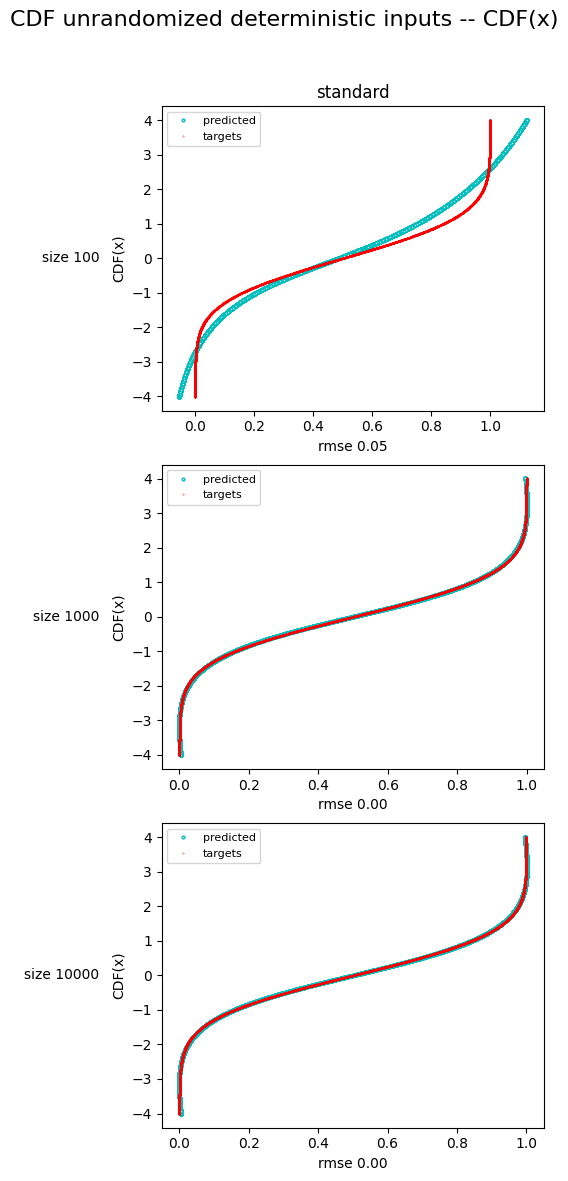

In [2]:
### Copy of Main.py as a juypter notebook to visualize results

###
### 0. Import packages and references
###
### - dataSeed = seed for simulations or (for csv input) for randomization of csv

exec(open('C:/dev/NeuronalNetworkTensorflowFramework/src/NNFramework/packages.py').read())
dataSeed = 1 
weightSeed = 1 


###
### 1. Training data
###

# 10^4 data data points
generator = DataImporter('C:/dev/NeuronalNetworkTensorflowFramework/src/Examples/CumulativeDensitiyFunction/1. CDF unrandomized/cdf_deterministic_data.csv','x','CDF(x)',testDataPath='C:/dev/NeuronalNetworkTensorflowFramework/src/Examples/CumulativeDensitiyFunction/1. CDF unrandomized/cdf_deterministic_data.csv') 
sizes = [100,1000,10000] # training set sizes. Performed one after the other and might be compared
nTest = None # Test set is given through a ratio of 0.8 in generator


###
### 2. Set Nueral network structure / Hyperparameters
### 

hiddenNeurons = 20               # we use equal neurons for each hidden layer
hiddenLayers = 2                # amount of hidden layers
activationFunctions = tf.nn.tanh    # activation functions of hidden layers
###
### 3. Train network
###
trainingMethod = TrainingMethod.Standard

xTest, yTest, yPredicted = train_and_test(generator, sizes, nTest, dataSeed, None, weightSeed, hiddenNeurons, hiddenLayers, activationFunctions, trainingMethod)
    
###
### 3. Study results
###   

# show predicitions
plot_results("CDF unrandomized deterministic inputs", yPredicted, xTest, "x", "CDF(x)", yTest, sizes, True, False, None, trainingMethod)